In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
from scipy import stats
import statsmodels.api as sm

In [50]:
df = pd.read_csv('10_Industry_Portfolios.csv')
df

,year,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,192607,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.16
1,192608,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.38
2,192609,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
3,192610,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.85
4,192611,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11
...,...,...,...,...,...,...,...,...,...,...,...
1124,202003,-11.49,-22.70,-16.86,-34.61,-9.82,-13.39,-7.58,-5.33,-13.02,-18.90
1125,202004,8.01,25.75,11.04,32.33,15.18,9.64,18.02,13.09,4.98,10.42
1126,202005,3.30,7.30,5.96,0.55,8.33,4.86,4.38,3.97,4.57,4.05
1127,202006,-0.03,14.20,2.56,-0.37,6.00,-2.44,4.21,-1.76,-5.04,0.00


In [51]:
# missing value is marked as -99.99 or -999
(df.isin([-99.99, -999])).any()

year     False
NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [52]:
R = np.array(df.mean()[1:])
R

array([0.95876882, 1.10244464, 1.01219663, 0.95164748, 1.13375554,
       0.85160319, 1.03370239, 1.08410097, 0.87232064, 0.89959256])

In [53]:
V = np.array(df.iloc[:, 1: 11].cov())
V

array([[21.04534715, 26.1983078 , 24.23348542, 17.8332085 , 24.32493911,
        14.44180596, 23.01873284, 20.23788573, 17.84249045, 24.68860101],
       [26.1983078 , 59.73830998, 41.90543017, 30.03650271, 43.16549613,
        22.51275902, 35.80329927, 27.26825761, 25.94875602, 39.89932139],
       [24.23348542, 41.90543017, 38.84361716, 28.61902625, 38.71932986,
        19.76235552, 30.7096408 , 26.24097237, 23.73466032, 36.25522403],
       [17.8332085 , 30.03650271, 28.61902625, 39.29771023, 27.50634726,
        15.12001987, 21.47384868, 19.52714705, 20.80503935, 27.83652346],
       [24.32493911, 43.16549613, 38.71932986, 27.50634726, 51.95089032,
        22.61665497, 33.28749238, 28.81715657, 24.39246459, 36.95890047],
       [14.44180596, 22.51275902, 19.76235552, 15.12001987, 22.61665497,
        21.14955159, 18.19331126, 15.47229732, 15.92337562, 20.86463886],
       [23.01873284, 35.80329927, 30.7096408 , 21.47384868, 33.28749238,
        18.19331126, 33.76156766, 24.02049659

In [54]:
A = np.array([R, np.ones(10)]) @ np.linalg.inv(V) @ np.array([R, np.ones(10)]).transpose()
A

array([[0.06153671, 0.06238345],
       [0.06238345, 0.07051788]])

In [55]:
r_f = 0.33

In [56]:
def weight(r):
    return np.linalg.inv(V) @ np.array([R, np.ones(10)]).transpose() @ np.linalg.inv(A) @ np.array([r, 1])[:, np.newaxis]

### Minimum variance portfolio

In [57]:
r_g = A[0, 1] / A[1, 1]
r_g

0.8846471867380211

In [58]:
x_g = weight(r_g)
x_g

array([[ 0.74667358],
       [-0.07431814],
       [-0.11023423],
       [ 0.17879179],
       [-0.09669704],
       [ 0.54077345],
       [-0.0459573 ],
       [ 0.08936285],
       [ 0.09826704],
       [-0.32666199]])

In [59]:
np.sqrt(x_t.transpose() @ V @ x_g)

array([[3.76574028]])

### Tangency portfolio

In [60]:
r_t = (A[0, 0] - A[0, 1] * r_f) / (A[0, 1] - A[1, 1] * r_f)
r_t

1.0469830933742499

In [61]:
x_t = weight(r_t)
x_t

array([[ 0.74089332],
       [ 0.09246424],
       [-0.17452734],
       [ 0.21315115],
       [ 0.13265099],
       [ 0.27367135],
       [ 0.05926835],
       [ 0.36749421],
       [ 0.01229388],
       [-0.71736013]])

In [110]:
np.sqrt(x_t.transpose() @ V @ x_t)

array([[4.28150459]])

### Efficient frontier

In [63]:
def frontier_sigma(r):
    return np.sqrt(np.array([r, 1]) @ np.linalg.inv(A) @ np.array([r, 1])[:, np.newaxis])
vfrontier_sigma = np.vectorize(frontier_sigma)

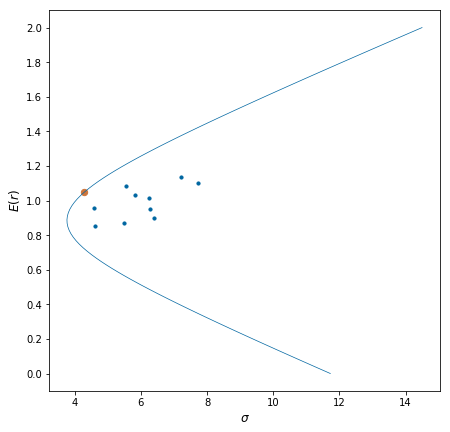

In [72]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(vfrontier_sigma(np.linspace(0 ,2, 100)), np.linspace(0 ,2, 100), linewidth=0.7)
ax.scatter(np.sqrt(V.diagonal()), R, s = 10)
ax.scatter(4.28150459, r_t, s = 40)

ax.set_xlabel(r'$\sigma$', fontsize = 12)
ax.set_ylabel(r'$E(r)$', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2));

In [73]:
fig.savefig('q2fig1.pdf', format = 'pdf')

### Monte Carlo simulation

In [120]:
R_mvp_simulate = []
R_tangency_simulate = []
std_mvp_simulate = []
std_tangency_simulate = []

for i in range(1000):
    sample = stats.multivariate_normal.rvs(mean = R, cov = V, size = df.shape[0])
    R_simulate = np.array(pd.DataFrame(sample).mean())
    V_simulate = np.array(pd.DataFrame(sample).cov())
    A_simulate = np.array([R_simulate, np.ones(10)]) @ np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose()
    r_g_simulate = A_simulate[0, 1] / A_simulate[1, 1]
    x_g_simulate = np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose() @ np.linalg.inv(A_simulate) @ np.array([r_g_simulate, 1])[:, np.newaxis]
    r_t_simulate = (A_simulate[0, 0] - A_simulate[0, 1] * r_f) / (A_simulate[0, 1] - A_simulate[1, 1] * r_f)
    x_t_simulate = np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose() @ np.linalg.inv(A_simulate) @ np.array([r_t_simulate, 1])[:, np.newaxis]

    R_mvp_simulate.append((R @ x_g_simulate)[0])
    R_tangency_simulate.append((R @ x_t_simulate)[0])
    std_mvp_simulate.append(np.sqrt(x_g_simulate.transpose() @ V @ x_g_simulate)[0, 0])
    std_tangency_simulate.append(np.sqrt(x_t_simulate.transpose() @ V @ x_t_simulate)[0, 0])
    
    
    
    
    
    

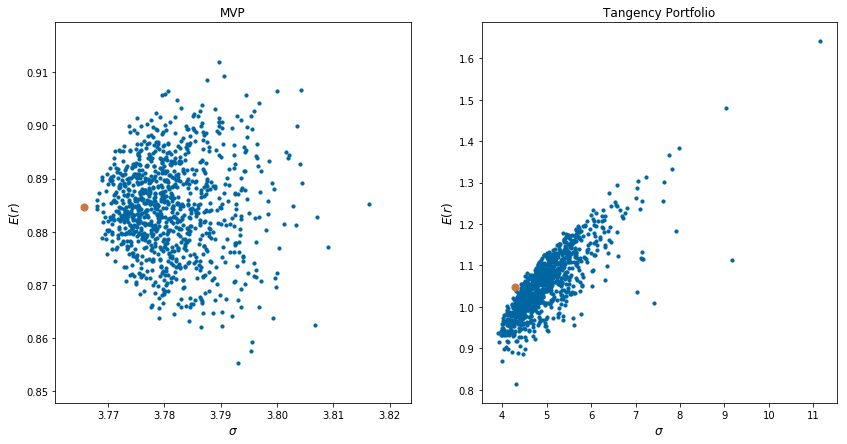

In [135]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))
ax[1].set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax[0].scatter(std_mvp_simulate, R_mvp_simulate, s = 10)
ax[0].scatter(3.76574028, r_g, s = 50)

ax[0].set_xlabel(r'$\sigma$', fontsize = 12)
ax[0].set_ylabel(r'$E(r)$', fontsize = 12)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[0].set_title('MVP')

ax[1].scatter(std_tangency_simulate, R_tangency_simulate, s = 10)
ax[1].scatter(4.28150459, r_t, s = 50)

ax[1].set_xlabel(r'$\sigma$', fontsize = 12)
ax[1].set_ylabel(r'$E(r)$', fontsize = 12)
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax[1].set_title('Tangency Portfolio');

In [136]:
fig.savefig('q2fig2.pdf', format = 'pdf')

### Block bootstrap simulation

In [149]:
R_mvp_simulate = []
R_tangency_simulate = []
std_mvp_simulate = []
std_tangency_simulate = []

for i in range(1000):
    sample = df.iloc[np.random.choice(df.shape[0], df.shape[0]), 1:].reset_index(drop = True)
    R_simulate = np.array(sample.mean())
    V_simulate = np.array(sample.cov())
    A_simulate = np.array([R_simulate, np.ones(10)]) @ np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose()
    r_g_simulate = A_simulate[0, 1] / A_simulate[1, 1]
    x_g_simulate = np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose() @ np.linalg.inv(A_simulate) @ np.array([r_g_simulate, 1])[:, np.newaxis]
    r_t_simulate = (A_simulate[0, 0] - A_simulate[0, 1] * r_f) / (A_simulate[0, 1] - A_simulate[1, 1] * r_f)
    x_t_simulate = np.linalg.inv(V_simulate) @ np.array([R_simulate, np.ones(10)]).transpose() @ np.linalg.inv(A_simulate) @ np.array([r_t_simulate, 1])[:, np.newaxis]

    R_mvp_simulate.append((R @ x_g_simulate)[0])
    R_tangency_simulate.append((R @ x_t_simulate)[0])
    std_mvp_simulate.append(np.sqrt(x_g_simulate.transpose() @ V @ x_g_simulate)[0, 0])
    std_tangency_simulate.append(np.sqrt(x_t_simulate.transpose() @ V @ x_t_simulate)[0, 0])
    

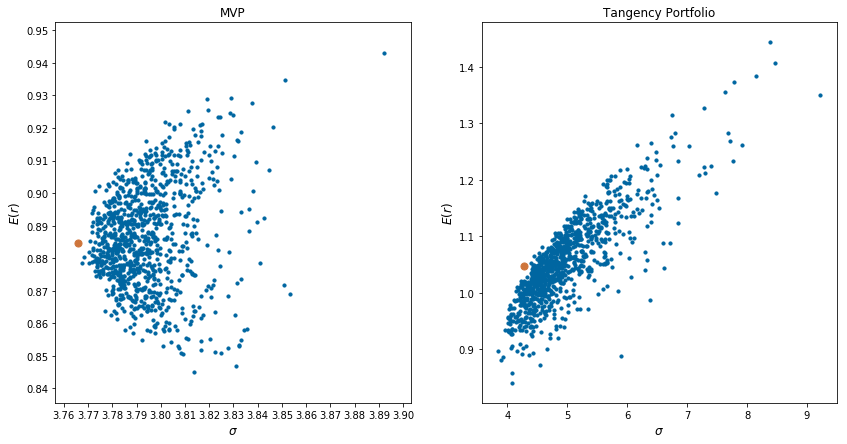

In [150]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))
ax[1].set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax[0].scatter(std_mvp_simulate, R_mvp_simulate, s = 10)
ax[0].scatter(3.76574028, r_g, s = 50)

ax[0].set_xlabel(r'$\sigma$', fontsize = 12)
ax[0].set_ylabel(r'$E(r)$', fontsize = 12)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[0].set_title('MVP')

ax[1].scatter(std_tangency_simulate, R_tangency_simulate, s = 10)
ax[1].scatter(4.28150459, r_t, s = 50)

ax[1].set_xlabel(r'$\sigma$', fontsize = 12)
ax[1].set_ylabel(r'$E(r)$', fontsize = 12)
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax[1].set_title('Tangency Portfolio');

In [151]:
fig.savefig('q2fig3.pdf', format = 'pdf')

### A simple asset pricing test

In [162]:
exrtn_tangency = np.array(df.iloc[:, 1:]) @ x_t - 0.33

In [167]:
alpha = []
beta = []

for i in range(1, 11):
    # Dependent variable (nparray)
    Y = np.array(df.iloc[:, i])[:, np.newaxis] - 0.33
    # Independent variables (nparray)
    X = exrtn_tangency
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    alpha.append(result.params[0])
    beta.append(result.params[1])

In [168]:
alpha

[2.624636619152909e-15,
 1.9845236565174673e-15,
 2.310651670001107e-15,
 1.915134717478395e-15,
 1.2628786905111156e-15,
 4.2049697057677804e-15,
 2.67841304690819e-15,
 2.345346139520643e-15,
 3.5180192092809648e-15,
 4.2674197509029455e-15]

In [169]:
beta

[0.8769646422306054,
 1.0773540525763365,
 0.9514821764890021,
 0.8670322653168546,
 1.1210243913700102,
 0.7274971941217941,
 0.9814769664723215,
 1.051769534431585,
 0.75639250457113,
 0.7944295549659568]

In [171]:
R - 0.33

array([0.62876882, 0.77244464, 0.68219663, 0.62164748, 0.80375554,
       0.52160319, 0.70370239, 0.75410097, 0.54232064, 0.56959256])

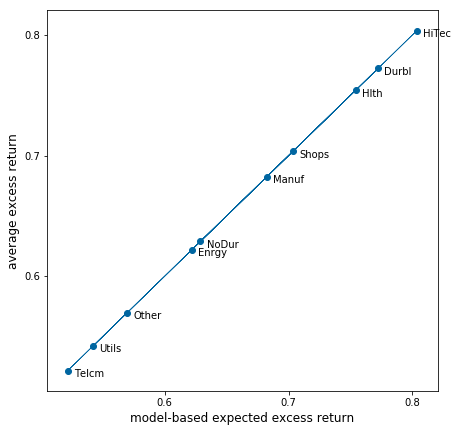

In [195]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(np.array(beta) * exrtn_tangency.mean(), R - 0.33, linewidth=0.7)
ax.scatter(np.array(beta) * exrtn_tangency.mean(), R - 0.33)
for i, txt in enumerate(df.columns[1:]):
    ax.annotate(txt, ((np.array(beta) * exrtn_tangency.mean())[i] + 0.005, (R - 0.33)[i] - 0.005))

ax.set_xlabel('model-based expected excess return', fontsize = 12)
ax.set_ylabel('average excess return', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1));

In [196]:
fig.savefig('q2fig4.pdf', format = 'pdf')

### An out-of-sample asset pricing test

In [199]:
df_insample = df[df['year'] < 197300]
df_outofsample = df[df['year'] > 197300]

In [200]:
R_insample = np.array(df_insample.mean()[1:])
V_insample = np.array(df_insample.iloc[:, 1: 11].cov())
A_insample = np.array([R_insample, np.ones(10)]) @ np.linalg.inv(V_insample) @ np.array([R_insample, np.ones(10)]).transpose()
r_t_insample = (A_insample[0, 0] - A_insample[0, 1] * r_f) / (A_insample[0, 1] - A_insample[1, 1] * r_f)
x_t_insample = np.linalg.inv(V_insample) @ np.array([R_insample, np.ones(10)]).transpose() @ np.linalg.inv(A_insample) @ np.array([r_t_insample, 1])[:, np.newaxis]

In [201]:
exrtn_tangency_outofsample = np.array(df_outofsample.iloc[:, 1:]) @ x_t_insample - 0.33

In [202]:
alpha = []
beta = []

for i in range(1, 11):
    # Dependent variable (nparray)
    Y = np.array(df_outofsample.iloc[:, i])[:, np.newaxis] - 0.33
    # Independent variables (nparray)
    X = exrtn_tangency_outofsample
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    alpha.append(result.params[0])
    beta.append(result.params[1])

In [203]:
alpha

[0.4320107112489559,
 0.07323133667260512,
 0.25889239276962833,
 0.19113269343352896,
 0.08073859037115907,
 0.20991034598146208,
 0.3437237170689636,
 0.21984122274287538,
 0.44378837600960264,
 0.23463791511252716]

In [204]:
beta

[0.4059404126314288,
 0.6884909188452741,
 0.5266279888801499,
 0.5335755027139294,
 0.8767014696922573,
 0.5587425235832781,
 0.525002506057063,
 0.6459208313425329,
 0.17751303972618437,
 0.4846412182336258]

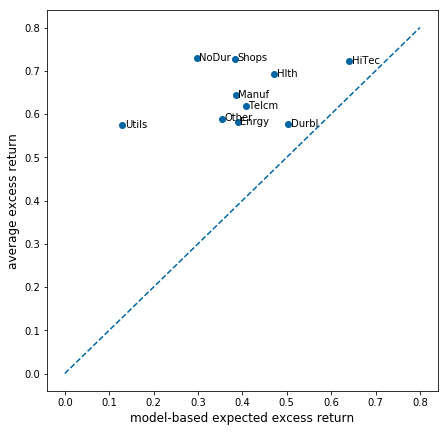

In [214]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.scatter(np.array(beta) * exrtn_tangency_outofsample.mean(), df_outofsample.iloc[:, 1:].mean() - 0.33)
for i, txt in enumerate(df.columns[1:]):
    ax.annotate(txt, ((np.array(beta) * exrtn_tangency_outofsample.mean())[i] + 0.005, (df_outofsample.iloc[:, 1:].mean() - 0.33)[i] - 0.005))
ax.plot(np.linspace(0, 0.8, 9), np.linspace(0, 0.8, 9), '--')
    
ax.set_xlabel('model-based expected excess return', fontsize = 12)
ax.set_ylabel('average excess return', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1));

In [215]:
fig.savefig('q2fig5.pdf', format = 'pdf')